In [1]:
import os
from datetime import datetime

# Define the base path
base_path = r"C:\Users\adamh\Desktop\Satelite_images\2015"

# Walk through the directory
for root, dirs, files in os.walk(base_path):
    print(f"\n📂 Directory: {root}")
    
    # List folders
    for d in dirs:
        folder_path = os.path.join(root, d)
        print(f"  [DIR]  {folder_path}")
    
    # List files
    for f in files:
        file_path = os.path.join(root, f)
        size = os.path.getsize(file_path)
        mod_time = datetime.fromtimestamp(os.path.getmtime(file_path))
        print(f"  [FILE] {file_path} | Size: {size} bytes | Modified: {mod_time}")



📂 Directory: C:\Users\adamh\Desktop\Satelite_images\2015
  [DIR]  C:\Users\adamh\Desktop\Satelite_images\2015\DATASTRIP
  [DIR]  C:\Users\adamh\Desktop\Satelite_images\2015\GRANULE
  [DIR]  C:\Users\adamh\Desktop\Satelite_images\2015\HTML
  [DIR]  C:\Users\adamh\Desktop\Satelite_images\2015\rep_info
  [FILE] C:\Users\adamh\Desktop\Satelite_images\2015\INSPIRE.xml | Size: 18641 bytes | Modified: 2025-10-27 15:09:06.848589
  [FILE] C:\Users\adamh\Desktop\Satelite_images\2015\manifest.safe | Size: 68903 bytes | Modified: 2025-10-27 15:09:06.882227
  [FILE] C:\Users\adamh\Desktop\Satelite_images\2015\MTD_MSIL2A.xml | Size: 54503 bytes | Modified: 2025-10-27 15:09:06.868720
  [FILE] C:\Users\adamh\Desktop\Satelite_images\2015\S2A_MSIL2A_20150716T105026_N0500_R051_T31UDQ_20231009T223128-ql.jpg | Size: 45174 bytes | Modified: 2025-10-27 15:09:06.873464

📂 Directory: C:\Users\adamh\Desktop\Satelite_images\2015\DATASTRIP
  [DIR]  C:\Users\adamh\Desktop\Satelite_images\2015\DATASTRIP\DS_S2RP_20


✅ Found TCI image for 2015: C:\Users\adamh\Desktop\Satelite_images\2015\GRANULE\L2A_T31UDQ_A000334_20150716T105024\IMG_DATA\R10m\T31UDQ_20150716T105026_TCI_10m.jp2


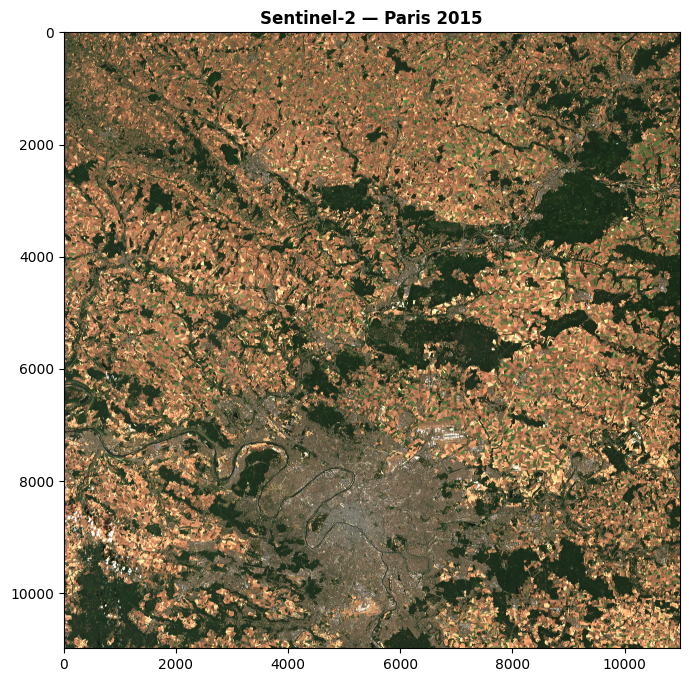

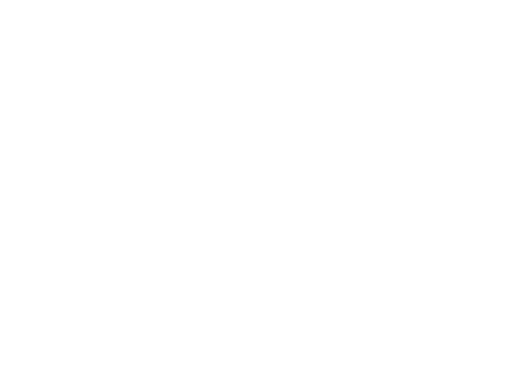


✅ Found TCI image for 2016: C:\Users\adamh\Desktop\Satelite_images\2016\GRANULE\L2A_T31UDQ_A007913_20161227T105527\IMG_DATA\R10m\T31UDQ_20161227T105442_TCI_10m.jp2


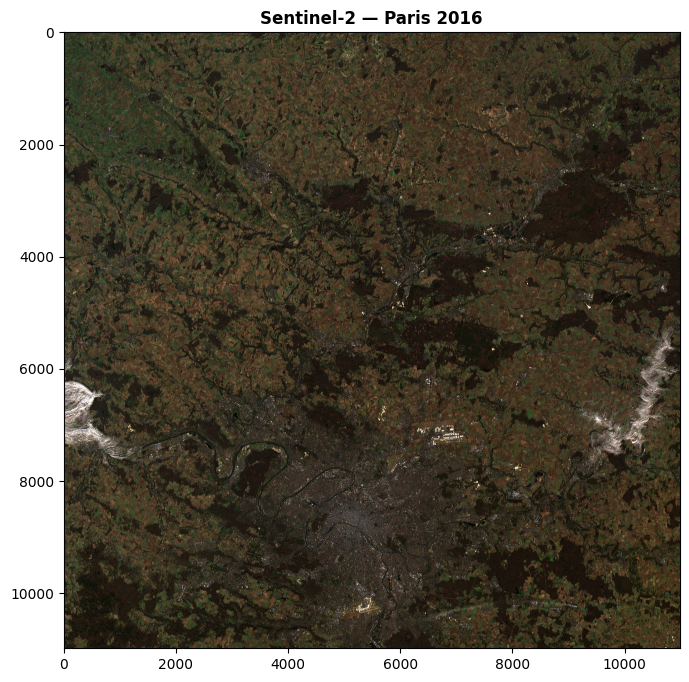

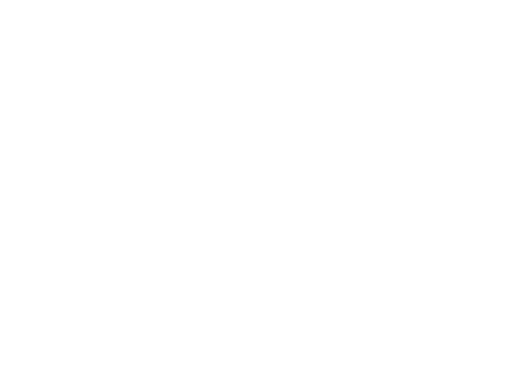


✅ Found TCI image for 2017: C:\Users\adamh\Desktop\Satelite_images\2017\GRANULE\L2A_T31UDQ_A008628_20170215T105607\IMG_DATA\R10m\T31UDQ_20170215T105121_TCI_10m.jp2


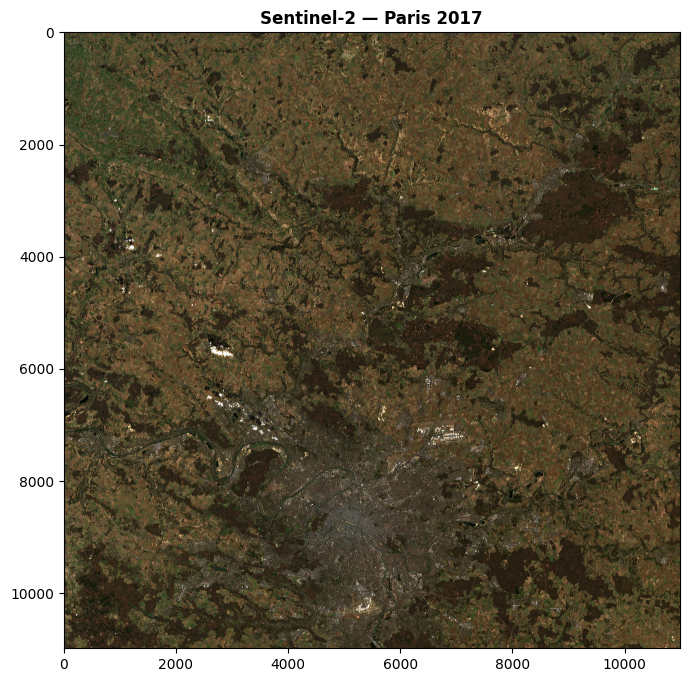

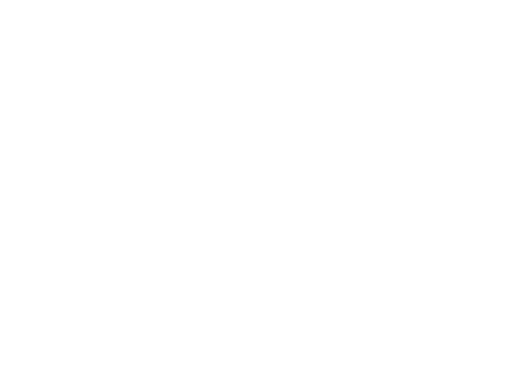


✅ Found TCI image for 2018: C:\Users\adamh\Desktop\Satelite_images\2018\GRANULE\L2A_T31UDQ_A005082_20180225T105018\IMG_DATA\R10m\T31UDQ_20180225T105019_TCI_10m.jp2


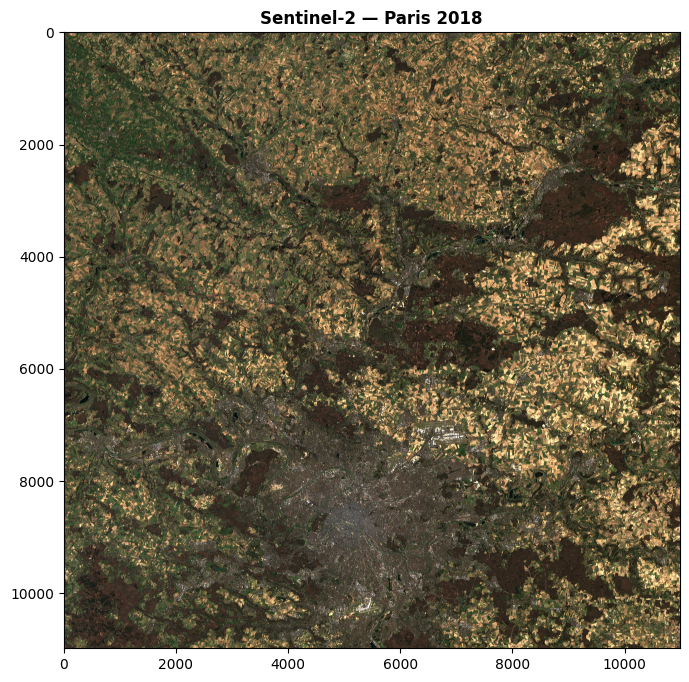

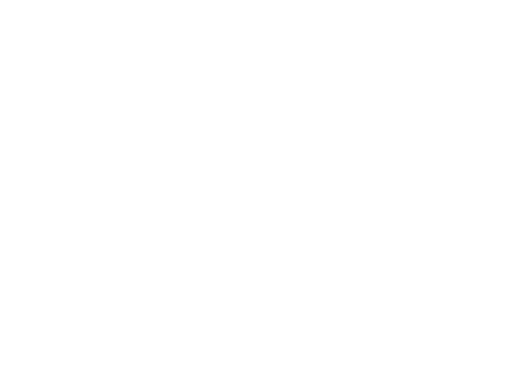


✅ Found TCI image for 2019: C:\Users\adamh\Desktop\Satelite_images\2019\GRANULE\L2A_T31UDQ_A021355_20190725T105702\IMG_DATA\R10m\T31UDQ_20190725T105031_TCI_10m.jp2


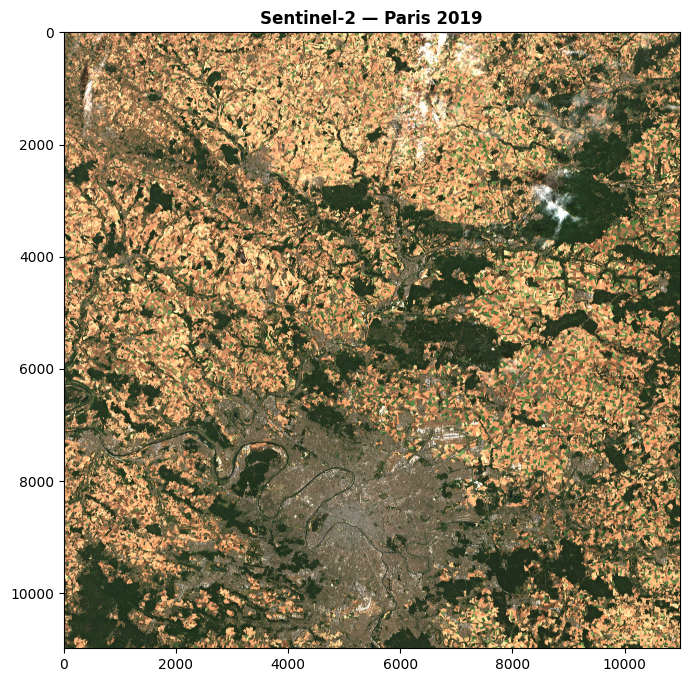

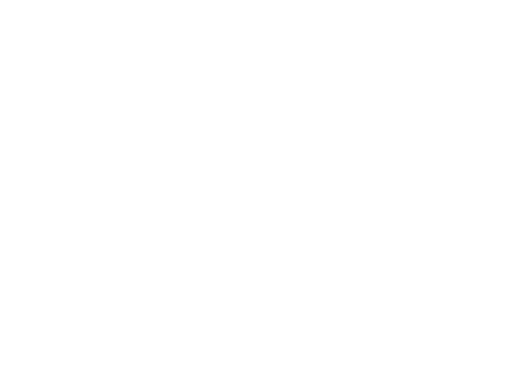


✅ Found TCI image for 2020: C:\Users\adamh\Desktop\Satelite_images\2020\GRANULE\L2A_T31UDQ_A014806_20200106T105431\IMG_DATA\R10m\T31UDQ_20200106T105339_TCI_10m.jp2


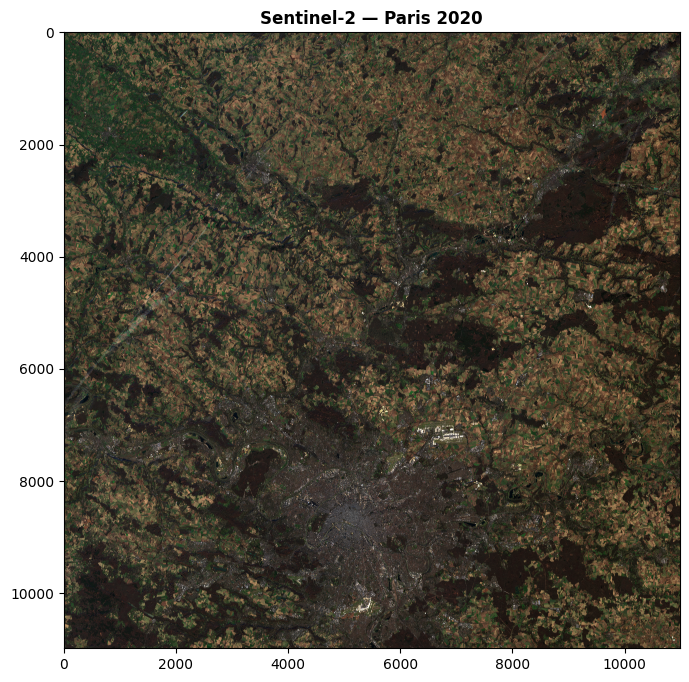

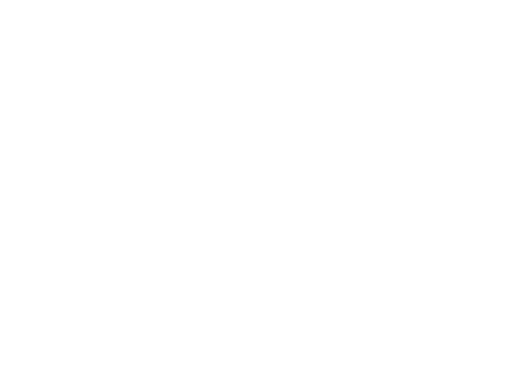


✅ Found TCI image for 2021: C:\Users\adamh\Desktop\Satelite_images\2021\GRANULE\L2A_T31UDQ_A029792_20210306T105443\IMG_DATA\R10m\T31UDQ_20210306T105031_TCI_10m.jp2


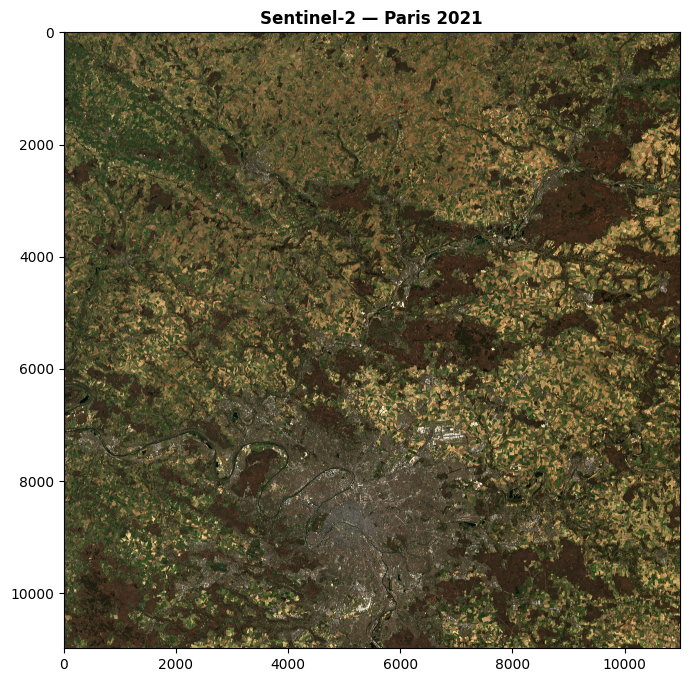

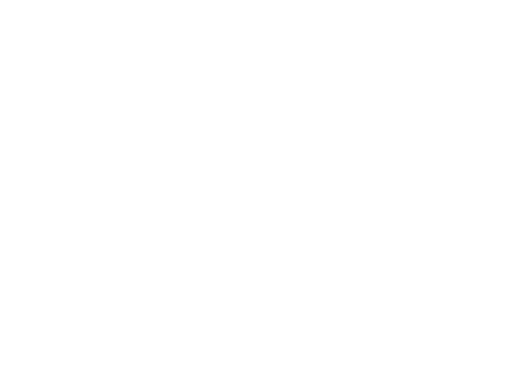

In [2]:
import os
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

# Base directory containing yearly folders
base_dir = r"C:\Users\adamh\Desktop\Satelite_images"

# Define the years you want to include
years = range(2015, 2022)  # 2015 through 2021 inclusive

# Loop through each year
for year in years:
    year_path = os.path.join(base_dir, str(year))
    
    # Search for TCI_10m.jp2 file inside this year's folder
    tci_path = None
    for root, dirs, files in os.walk(year_path):
        for f in files:
            if f.endswith("TCI_10m.jp2"):  # True color image
                tci_path = os.path.join(root, f)
                break
        if tci_path:
            break

    if tci_path and os.path.exists(tci_path):
        print(f"\n✅ Found TCI image for {year}: {tci_path}")
        
        # Open and plot the image
        with rasterio.open(tci_path) as src:
            img = src.read()
        
        plt.figure(figsize=(8, 8))
        show(img, title=f"Sentinel-2 — Paris {year}", adjust='linear')
        plt.axis('off')
        plt.show()
        
    else:
        print(f"\n⚠️ No TCI_10m.jp2 found for {year}")


In [3]:
# I want a function that you give it a year, an index i,j and patch_size and then it plots the image between (i,j) 
# and (i+patch_size, j+patch_size)

import os
import matplotlib.pyplot as plt
import rasterio
from rasterio.windows import Window

def plot_paris_patch(year, i, j, patch_size, base_dir=r"C:\Users\adamh\Desktop\Satelite_images"):
    """
    Plots a square patch of the Paris Sentinel-2 image for a given year.

    Parameters
    ----------
    year : int
        Year of the satellite image (e.g., 2018)
    i, j : int
        Top-left pixel coordinates (row=i, col=j)
    patch_size : int
        Size of the square patch to extract (in pixels)
    base_dir : str, optional
        Base path containing yearly satellite folders
    """
    # --- Locate the TCI_10m.jp2 file ---
    year_path = os.path.join(base_dir, str(year))
    tci_path = None
    for root, dirs, files in os.walk(year_path):
        for f in files:
            if f.endswith("TCI_10m.jp2"):
                tci_path = os.path.join(root, f)
                break
        if tci_path:
            break

    if not tci_path:
        print(f"⚠️ No TCI_10m.jp2 found for {year}")
        return

    print(f"✅ Using file: {tci_path}")

    # --- Open image and extract patch ---
    with rasterio.open(tci_path) as src:
        window = Window(j, i, patch_size, patch_size)
        patch = src.read(window=window)  # shape: (bands, patch_size, patch_size)
        transform = src.window_transform(window)

    # --- Plot patch ---
    plt.figure(figsize=(6, 6))
    plt.title(f"Paris patch — Year {year}\nTop-left (i={i}, j={j}), size={patch_size}px")
    plt.imshow(patch.transpose(1, 2, 0))  # Convert (bands, rows, cols) → (rows, cols, bands)
    plt.axis("off")
    plt.show()


✅ Using file: C:\Users\adamh\Desktop\Satelite_images\2018\GRANULE\L2A_T31UDQ_A005082_20180225T105018\IMG_DATA\R10m\T31UDQ_20180225T105019_TCI_10m.jp2


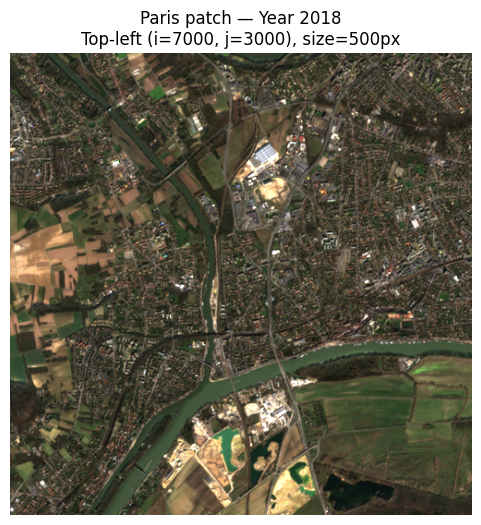

In [9]:
# Example: plot a 500×500 patch from the 2018 image, starting at pixel (1000, 2000)
plot_paris_patch(2018, i=7000, j=3000, patch_size=500)
# i = 7000 to i = 10000 is where there is a lot of buildings
# j = 3000 to j = 7000 is where there is a lot of buildings now I want you to do this 
# write for me a function that you give it num_patch, patch_size then from all ,photos it generate
# num_patch image for each year (if you have num_patch = 1000 you should generate 1000 (i,j) indexes that 
# satisfies the constraint to see the building and then give me the same subregion across different years)
# so I think you should give me a numpy array like this [num_patch, patch_size, patch_size, 3] 3 for rgb and 
# be aware that we are seeing a temporal serie evolution so stock them in jspn file where "2015" access the dataset
# for 2015

In [11]:
import os
import json
import numpy as np
import rasterio
from rasterio.windows import Window
from tqdm import tqdm

def build_latlon_patches(base_dir,
                         num_patch=1000,
                         patch_size=64,
                         i_range=(7000, 10000),
                         j_range=(3000, 7000),
                         years=range(2015, 2022),
                         output_json="temporal_latlon_patches.json"):
    """
    Generates latitude-longitude patches for a given spatial area across multiple years.

    Parameters
    ----------
    base_dir : str
        Directory containing yearly folders (e.g. C:\\Users\\adamh\\Desktop\\Satelite_images)
    num_patch : int
        Number of random patches per year
    patch_size : int
        Size of square patch (pixels)
    i_range, j_range : tuple
        Pixel coordinate range (row=i, col=j)
    years : iterable
        Range or list of years (e.g. range(2015, 2022))
    output_json : str
        Path to save JSON output

    Returns
    -------
    dict
        Dictionary mapping each year to its [num_patch, patch_size, patch_size, 2] lat/lon array
    """

    all_patches = {}

    # Generate random coordinates once — same patches for all years
    np.random.seed(42)
    i_coords = np.random.randint(i_range[0], i_range[1] - patch_size, num_patch)
    j_coords = np.random.randint(j_range[0], j_range[1] - patch_size, num_patch)
    coords = list(zip(i_coords, j_coords))

    for year in years:
        print(f"\n📅 Processing {year}...")
        year_path = os.path.join(base_dir, str(year))

        # Find TCI file for that year
        tci_path = None
        for root, dirs, files in os.walk(year_path):
            for f in files:
                if f.endswith("TCI_10m.jp2"):
                    tci_path = os.path.join(root, f)
                    break
            if tci_path:
                break

        if not tci_path:
            print(f"⚠️ No TCI_10m.jp2 found for {year}, skipping...")
            continue

        # Open the raster and compute lat/lon per pixel
        with rasterio.open(tci_path) as src:
            transform = src.transform
            crs = src.crs
            year_patches = []

            for (i, j) in tqdm(coords, desc=f"Computing lat/lon {year}"):
                window = Window(j, i, patch_size, patch_size)
                # Create pixel grid within this patch
                rows, cols = np.meshgrid(
                    np.arange(i, i + patch_size),
                    np.arange(j, j + patch_size),
                    indexing='ij'
                )

                # Convert to geographic coordinates (lon, lat)
                xs, ys = rasterio.transform.xy(transform, rows, cols)
                xs = np.array(xs)
                ys = np.array(ys)

                # Convert to lat/lon if CRS is projected
                if crs.is_projected:
                    import pyproj
                    transformer = pyproj.Transformer.from_crs(crs, "EPSG:4326", always_xy=True)
                    lon, lat = transformer.transform(xs, ys)
                else:
                    lon, lat = xs, ys

                patch = np.stack([lat, lon], axis=-1)  # shape: (patch_size, patch_size, 2)
                year_patches.append(patch.tolist())

        all_patches[str(year)] = year_patches

    # Save dataset
    with open(output_json, "w") as f:
        json.dump(all_patches, f)

    print(f"\n✅ Saved lat/lon patch dataset to {output_json}")
    return all_patches


In [13]:
base_path = r"C:\Users\adamh\Desktop\Satelite_images"

dataset = build_latlon_patches(
    base_dir=base_path,
    num_patch=2000,
    patch_size=64,
    output_json="paris_latlon_patches.json"
)



📅 Processing 2015...


Computing lat/lon 2015: 100%|██████████| 2000/2000 [00:07<00:00, 267.56it/s]



📅 Processing 2016...


Computing lat/lon 2016: 100%|██████████| 2000/2000 [00:08<00:00, 249.96it/s]



📅 Processing 2017...


Computing lat/lon 2017: 100%|██████████| 2000/2000 [00:08<00:00, 239.61it/s]



📅 Processing 2018...


Computing lat/lon 2018: 100%|██████████| 2000/2000 [00:07<00:00, 262.68it/s]



📅 Processing 2019...


Computing lat/lon 2019: 100%|██████████| 2000/2000 [00:08<00:00, 243.47it/s]



📅 Processing 2020...


Computing lat/lon 2020: 100%|██████████| 2000/2000 [00:09<00:00, 214.62it/s]



📅 Processing 2021...


Computing lat/lon 2021: 100%|██████████| 2000/2000 [00:06<00:00, 316.60it/s]



✅ Saved lat/lon patch dataset to paris_latlon_patches.json


                                    Part two

In [15]:
import os
import pandas as pd

# Define all paths
paths = {
    2015: r"C:\Users\adamh\Desktop\IRIS\2015",
    2016: r"C:\Users\adamh\Desktop\IRIS\2016",
    2017: r"C:\Users\adamh\Desktop\IRIS\2017",
    2018: r"C:\Users\adamh\Desktop\IRIS\2018",
    2019: r"C:\Users\adamh\Desktop\IRIS\2019",
    2020: r"C:\Users\adamh\Desktop\IRIS\2020",
    2021: r"C:\Users\adamh\Desktop\IRIS\2021",
}

# Loop through all folders
for year, folder in paths.items():
    iris_file = None
    for f in os.listdir(folder):
        if "iris_latlon" in f.lower() and f.lower().endswith(".csv"):
            iris_file = os.path.join(folder, f)
            break

    if not iris_file:
        print(f"⚠️ No CSV file containing 'iris_latlon' found in {folder}")
        continue

    try:
        df = pd.read_csv(iris_file, nrows=5)  # only read a few rows for speed
        print(f"\n✅ {year}: Loaded {iris_file}")
        print("Columns:", list(df.columns))
        if {"CODE_IRIS", "geometry"}.issubset(df.columns):
            print("   → Both 'CODE_IRIS' and 'geometry' columns are present ✅")
        else:
            print("   ⚠️ Missing expected columns! Present columns are:", list(df.columns))
    except Exception as e:
        print(f"\n❌ Error reading {iris_file}: {e}")



✅ 2015: Loaded C:\Users\adamh\Desktop\IRIS\2015\iris_latlon.csv
Columns: ['CODE_IRIS', 'geometry']
   → Both 'CODE_IRIS' and 'geometry' columns are present ✅

✅ 2016: Loaded C:\Users\adamh\Desktop\IRIS\2016\iris_latlon.csv
Columns: ['CODE_IRIS', 'geometry']
   → Both 'CODE_IRIS' and 'geometry' columns are present ✅

✅ 2017: Loaded C:\Users\adamh\Desktop\IRIS\2017\iris_latlon.csv
Columns: ['CODE_IRIS', 'geometry']
   → Both 'CODE_IRIS' and 'geometry' columns are present ✅

✅ 2018: Loaded C:\Users\adamh\Desktop\IRIS\2018\iris_latlon.csv
Columns: ['CODE_IRIS', 'geometry']
   → Both 'CODE_IRIS' and 'geometry' columns are present ✅

✅ 2019: Loaded C:\Users\adamh\Desktop\IRIS\2019\iris_latlon.csv
Columns: ['CODE_IRIS', 'geometry']
   → Both 'CODE_IRIS' and 'geometry' columns are present ✅

✅ 2020: Loaded C:\Users\adamh\Desktop\IRIS\2020\iris_latlon.csv
Columns: ['CODE_IRIS', 'geometry']
   → Both 'CODE_IRIS' and 'geometry' columns are present ✅

✅ 2021: Loaded C:\Users\adamh\Desktop\IRIS\20

                                      Correspondance

In [1]:
import json
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely import wkt
from tqdm import tqdm

def assign_code_iris_vectorized_flat_batched(
    paris_json_path,
    iris_csv_paths,
    output_json="paris_latlon_patches_with_iris.json",
    batch_size=100_000  # how many pixels to process at once
):
    """
    Vectorized CODE_IRIS attribution for flattened patches (each [N_pixels, 2]).
    Includes batching and progress bars for large datasets.
    """
    with open(paris_json_path, "r") as f:
        paris_data = json.load(f)

    results = {}

    for year, patches in paris_data.items():
        if int(year) not in iris_csv_paths:
            print(f"⚠️ No IRIS CSV for {year}, skipping...")
            continue

        print(f"\n📅 Processing year {year}...")
        iris_csv = iris_csv_paths[int(year)]

        # --- Load IRIS polygons ---
        iris_df = pd.read_csv(iris_csv)
        iris_df["geometry"] = iris_df["geometry"].apply(wkt.loads)
        iris_gdf = gpd.GeoDataFrame(iris_df, geometry="geometry", crs="EPSG:4326")

        # --- Flatten all pixel coordinates across all patches ---
        all_points = np.concatenate(patches, axis=0)  # shape [num_patch * N_pixels, 2]
        lats = all_points[:, 0]
        lons = all_points[:, 1]
        total_points = len(all_points)
        print(f"   → Total {total_points:,} pixels for spatial join")

        # --- Prepare for batched join ---
        codes = np.empty(total_points, dtype=object)

        for start in tqdm(range(0, total_points, batch_size), desc=f"Joining {year}", ncols=80):
            end = min(start + batch_size, total_points)
            batch_lats = lats[start:end]
            batch_lons = lons[start:end]

            # Create GeoDataFrame for batch
            points_gdf = gpd.GeoDataFrame(
                geometry=gpd.points_from_xy(batch_lons, batch_lats),
                crs="EPSG:4326"
            )

            # Spatial join (vectorized for this batch)
            joined = gpd.sjoin(
                points_gdf,
                iris_gdf[["CODE_IRIS", "geometry"]],
                how="left",
                predicate="within"
            )

            codes[start:end] = joined["CODE_IRIS"].to_numpy()

        # --- Split codes back into patches ---
        split_sizes = [len(p) for p in patches]
        split_codes = np.split(codes, np.cumsum(split_sizes)[:-1])
        results[year] = [c.tolist() for c in split_codes]

        matched = np.count_nonzero(~pd.isna(codes))
        print(f"✅ Finished {year}: matched {matched:,}/{total_points:,} pixels")

    with open(output_json, "w") as f:
        json.dump(results, f)

    print(f"\n✅ Saved results with CODE_IRIS mapping to {output_json}")
    return results


In [ ]:
iris_csv_paths = {
    2015: r"C:\Users\adamh\Desktop\IRIS\2015\iris_latlon.csv",
    2016: r"C:\Users\adamh\Desktop\IRIS\2016\iris_latlon.csv",
    2017: r"C:\Users\adamh\Desktop\IRIS\2017\iris_latlon.csv",
    2018: r"C:\Users\adamh\Desktop\IRIS\2018\iris_latlon.csv",
    2019: r"C:\Users\adamh\Desktop\IRIS\2019\iris_latlon.csv",
    2020: r"C:\Users\adamh\Desktop\IRIS\2020\iris_latlon.csv",
    2021: r"C:\Users\adamh\Desktop\IRIS\2021\iris_latlon.csv",
}

assign_code_iris_vectorized_flat_batched(
    paris_json_path=r"C:\Users\adamh\Desktop\Satelite_images\paris_latlon_patches.json",
    iris_csv_paths=iris_csv_paths,
    output_json=r"C:\Users\adamh\Desktop\Satelite_images\paris_latlon_patches_with_iris.json",
    batch_size=100_000  # adjust depending on your RAM
)



📅 Processing year 2015...
   → Total 8,192,000 pixels for spatial join


Joining 2015: 100%|█████████████████████████████| 82/82 [00:37<00:00,  2.17it/s]


✅ Finished 2015: matched 8,192,000/8,192,000 pixels

📅 Processing year 2016...
   → Total 8,192,000 pixels for spatial join


Joining 2016: 100%|█████████████████████████████| 82/82 [00:10<00:00,  7.48it/s]


✅ Finished 2016: matched 8,192,000/8,192,000 pixels

📅 Processing year 2017...
   → Total 8,192,000 pixels for spatial join


Joining 2017: 100%|█████████████████████████████| 82/82 [00:10<00:00,  8.10it/s]


✅ Finished 2017: matched 8,192,000/8,192,000 pixels

📅 Processing year 2018...
   → Total 8,192,000 pixels for spatial join


Joining 2018: 100%|█████████████████████████████| 82/82 [00:10<00:00,  7.58it/s]


✅ Finished 2018: matched 8,192,000/8,192,000 pixels

📅 Processing year 2019...
   → Total 8,192,000 pixels for spatial join


Joining 2019: 100%|█████████████████████████████| 82/82 [00:10<00:00,  7.63it/s]


✅ Finished 2019: matched 8,192,000/8,192,000 pixels

📅 Processing year 2020...
   → Total 8,192,000 pixels for spatial join


Joining 2020: 100%|█████████████████████████████| 82/82 [00:11<00:00,  6.86it/s]


✅ Finished 2020: matched 8,192,000/8,192,000 pixels

📅 Processing year 2021...
   → Total 8,192,000 pixels for spatial join


Joining 2021: 100%|█████████████████████████████| 82/82 [00:11<00:00,  7.07it/s]


✅ Finished 2021: matched 8,192,000/8,192,000 pixels

✅ Saved results with CODE_IRIS mapping to C:\Users\adamh\Desktop\Satelite_images\paris_latlon_patches_with_iris.json
